# Lesson - Joining Data in SQL
it's common for databases to have data in more than one table. If we want to be able to work with that data, we'll have to combine multiple tables within a query. The way we do this in SQL is using joins.

**Database**We will use a version of the CIA World Factbook (Factbook) database (`factbook_2.db`) This database has one table called `facts` where each row represented a country from the Factbook. 
To the original database, we've added a new table, called `cities` which contains information on major urban areas from countries in the Factbook. 

**Load sql and connect to the Database factbook.db using following magic:**

In [1]:
%%capture
%reload_ext sql
%sql sqlite:///factbook_2.db    

### Query the database to get table information for `facts.db` directly:
**Use %%sql magic before query in each code cell to avoid returning an error 

In [2]:
%%sql
SELECT * 
FROM sqlite_master 
WHERE type='table';

 * sqlite:///factbook_2.db
Done.


type,name,tbl_name,rootpage,sql
table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, ""code"" varchar(255) NOT NULL, ""name"" varchar(255) NOT NULL, ""area"" integer, ""area_land"" integer, ""area_water"" integer, ""population"" integer, ""population_growth"" float, ""birth_rate"" float, ""death_rate"" float, ""migration_rate"" float)"
table,cities,cities,2,"CREATE TABLE cities ( id integer primary key, name text, population integer, capital bool, facts_id text, foreign key(facts_id) references facts(id) )"


### Displaying Tables Info and first five rows of the Tables

In [3]:
%%sql
PRAGMA TABLE_INFO(facts)

 * sqlite:///factbook_2.db
Done.


cid,name,type,notnull,dflt_value,pk
0,id,INTEGER,1,None,1
1,code,varchar(255),1,None,0
2,name,varchar(255),1,None,0
3,area,integer,0,None,0
4,area_land,integer,0,None,0
5,area_water,integer,0,None,0
6,population,integer,0,None,0
7,population_growth,float,0,None,0
8,birth_rate,float,0,None,0
9,death_rate,float,0,None,0


In [4]:
%%sql
SELECT *
FROM facts
LIMIT 5;   

 * sqlite:///factbook_2.db
Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
2,al,Albania,28748,27398,1350,3029278,0.3,12.92,6.58,3.3
3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.0
5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [5]:
%%sql
PRAGMA TABLE_INFO(cities)

 * sqlite:///factbook_2.db
Done.


cid,name,type,notnull,dflt_value,pk
0,id,integer,0,None,1
1,name,text,0,None,0
2,population,integer,0,None,0
3,capital,bool,0,None,0
4,facts_id,text,0,None,0


In [6]:
%%sql
SELECT *
FROM cities
LIMIT 5;   

 * sqlite:///factbook_2.db
Done.


id,name,population,capital,facts_id
1,Oranjestad,37000,1,216
2,Saint John'S,27000,1,6
3,Abu Dhabi,942000,1,184
4,Dubai,1978000,0,184
5,Sharjah,983000,0,184


### Performing an Inner Join
- On common id
- Select all columns from both tables
- Limit results to 10

**Inner join will include:**
- Rows from the cities table that have a cities.facts_id that matches a facts.id from facts.

**inner join will not include:**

- Rows from the cities table that have a cities.facts_id that doesn't match any facts.id from facts.
- Rows from the facts table that have a facts.id that doesn't match any cities.facts_id from cities.
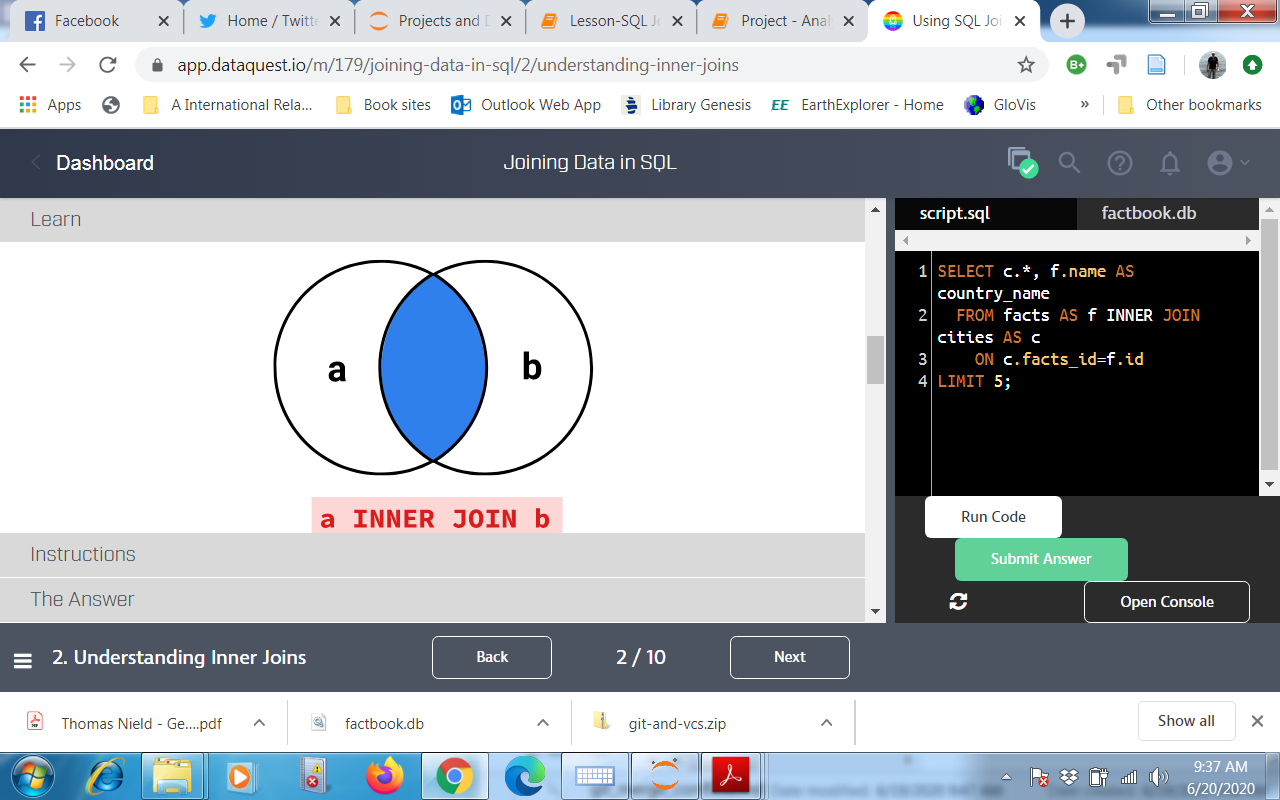

In [7]:
%%sql
SELECT *
  FROM facts INNER JOIN cities
    ON facts.id=cities.facts_id
LIMIT 10;  

 * sqlite:///factbook_2.db
Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,id_1,name_1,population_1,capital,facts_id
216,aa,Aruba,180,180,0,112162,1.33,12.56,8.18,8.92,1,Oranjestad,37000,1,216
6,ac,Antigua and Barbuda,442,442,0,92436,1.24,15.85,5.69,2.21,2,Saint John'S,27000,1,6
184,ae,United Arab Emirates,83600,83600,0,5779760,2.58,15.43,1.97,12.36,3,Abu Dhabi,942000,1,184
184,ae,United Arab Emirates,83600,83600,0,5779760,2.58,15.43,1.97,12.36,4,Dubai,1978000,0,184
184,ae,United Arab Emirates,83600,83600,0,5779760,2.58,15.43,1.97,12.36,5,Sharjah,983000,0,184
1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,6,Kabul,3097000,1,1
3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,7,Algiers,2916000,1,3
3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,8,Oran,783000,0,3
11,aj,Azerbaijan,86600,82629,3971,9780780,0.96,16.64,7.07,0.0,9,Baku,2123000,1,11
2,al,Albania,28748,27398,1350,3029278,0.3,12.92,6.58,3.3,10,Tirana,419000,1,2


**Selecting Columns and using Aliases for Inner Joins**
- We can also create aliases for table names, which makes queries with joins easier to both read and write. 
- We can also combine aliases with wildcards - for instance, using the aliases created above, c.* would give us all columns from the table cities.

Write a query:
- Joins cities to facts using an INNER JOIN.
- Uses aliases for table names. (remember order of execution for SQL)
- All columns from cities.
- The name column from facts aliased to country_name.
- Includes only the first 5 rows.

In [8]:
%%sql
SELECT c.*, f.name AS country_name 
  FROM facts AS f INNER JOIN cities AS c
    ON c.facts_id=f.id
LIMIT 5; 

 * sqlite:///factbook_2.db
Done.


id,name,population,capital,facts_id,country_name
1,Oranjestad,37000,1,216,Aruba
2,Saint John'S,27000,1,6,Antigua and Barbuda
3,Abu Dhabi,942000,1,184,United Arab Emirates
4,Dubai,1978000,0,184,United Arab Emirates
5,Sharjah,983000,0,184,United Arab Emirates


Write a query:
- that uses an INNER JOIN to join the two tables in query and returns, in order:
- A column of country names, called country.
- A column of each country's capital city, called capital_city

In [9]:
%%sql
SELECT f.name AS country, c.name AS capital_city
  FROM facts AS f INNER JOIN cities AS c
    ON f.id=c.facts_id
WHERE c.capital=TRUE 

 * sqlite:///factbook_2.db
Done.


country,capital_city
Aruba,Oranjestad
Antigua and Barbuda,Saint John'S
United Arab Emirates,Abu Dhabi
Afghanistan,Kabul
Algeria,Algiers
Azerbaijan,Baku
Albania,Tirana
Armenia,Yerevan
Andorra,Andorra La Vella
Angola,Luanda


### Left Joins

In [10]:
%%sql
SELECT COUNT(*) AS number_rows
  FROM facts

 * sqlite:///factbook_2.db
Done.


number_rows
261


In [11]:
%%sql
SELECT COUNT(*) AS number_rows
  FROM cities

 * sqlite:///factbook_2.db
Done.


number_rows
397


In [12]:
%%sql
SELECT COUNT(DISTINCT(facts_id)) AS matching_rows
  FROM cities

 * sqlite:///factbook_2.db
Done.


matching_rows
210


Data for all countries is not contained in cities. We can explore missing data for facts using a `left join` which will contain all entries for left table joined with matching entries for right. Entries in left table with no corresponding entry in right table will be included but with corresponding data from right included as missing or null values. 
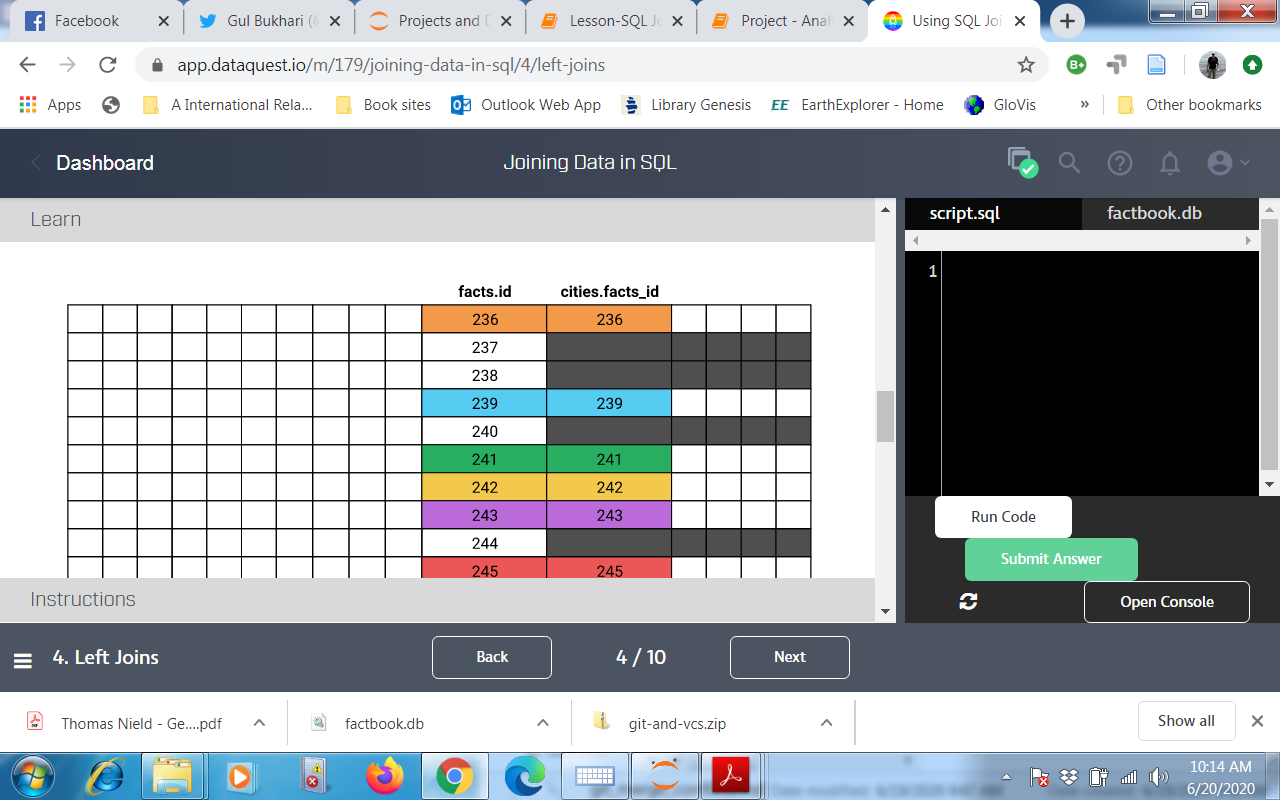
```
ELECT * FROM facts
LEFT JOIN cities ON cities.facts_id = facts.id
```
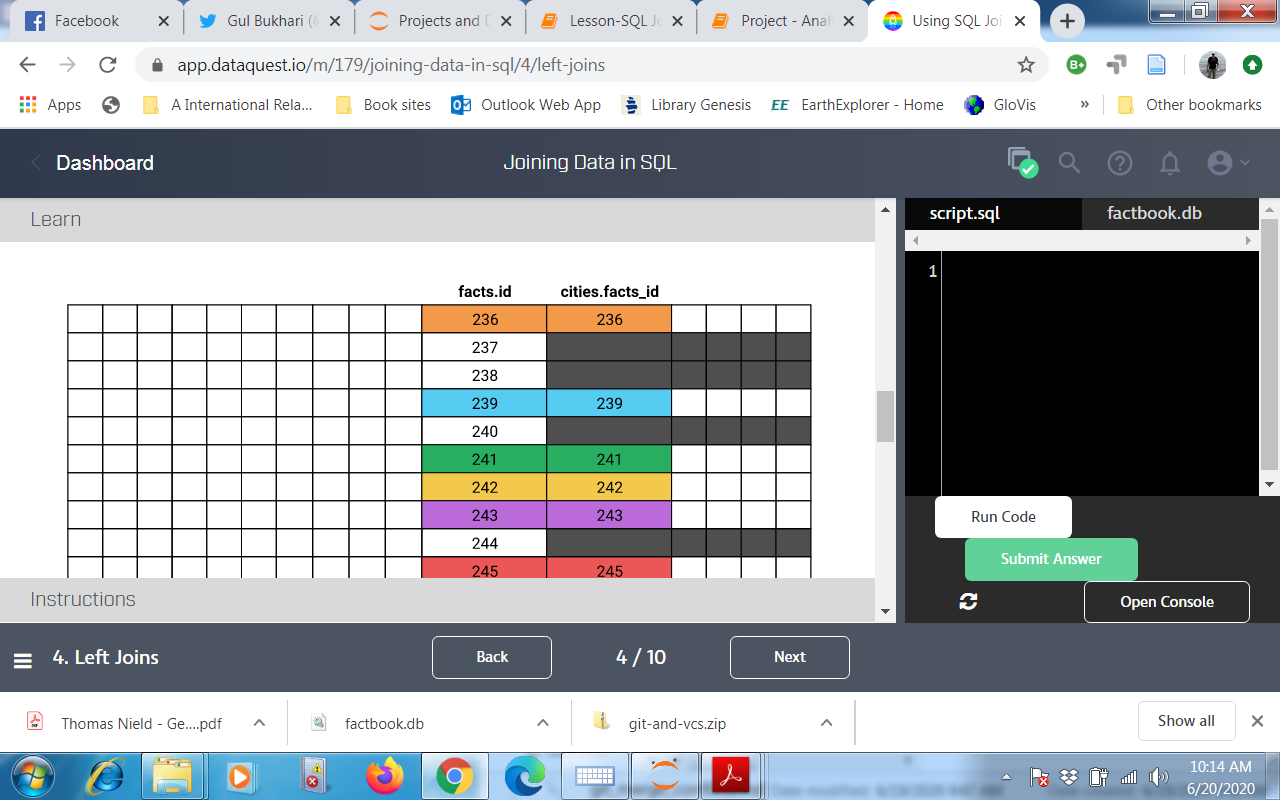



Write a query:
- that returns the countries that don't exist in cities:
Query should return two columns:
- The country names, with the alias country.
- The country population.
- Use a LEFT JOIN to join cities to facts.
- Include only the countries from facts that don't have a corresponding value in cities

In [13]:
%%sql
SELECT f.name AS country, f.population
  FROM facts AS f LEFT JOIN cities AS c
    ON c.facts_id=f.id
WHERE c.facts_id Is NULL  

 * sqlite:///factbook_2.db
Done.


country,population
Kosovo,1870981
Monaco,30535
Nauru,9540
San Marino,33020
Singapore,5674472
Holy See (Vatican City),842
Taiwan,23415126
European Union,513949445
Ashmore and Cartier Islands,None
Christmas Island,1530


### Right and Outer Joins
There are two less-common join types SQLite does not support. The first is a right join. A right join, as the name indicates, is exactly the opposite of a left join. While the left join includes all rows in the table before the JOIN clause, the right join includes all rows in the new table in the JOIN clause. Following queries using left and right joins will produce same results:
~~~
SELECT f.name country, c.name city
FROM facts f
LEFT JOIN cities c ON c.facts_id = f.id
LIMIT 5;
~~~

```
SELECT f.name country, c.name city
FROM cities c
RIGHT JOIN facts f ON f.id = c.facts_id
LIMIT 5;
```
The main reason a right join would be used is when you are joining more than two tables. In these cases, using a right join is preferable because it can avoid restructuring your whole query to join one table. Outside of this, right joins are used reasonably rarely, so for simple joins it's better to use a left join than a right as it will be easier for query to be read and understood by others.
We can see a right join in the Venn diagram below:
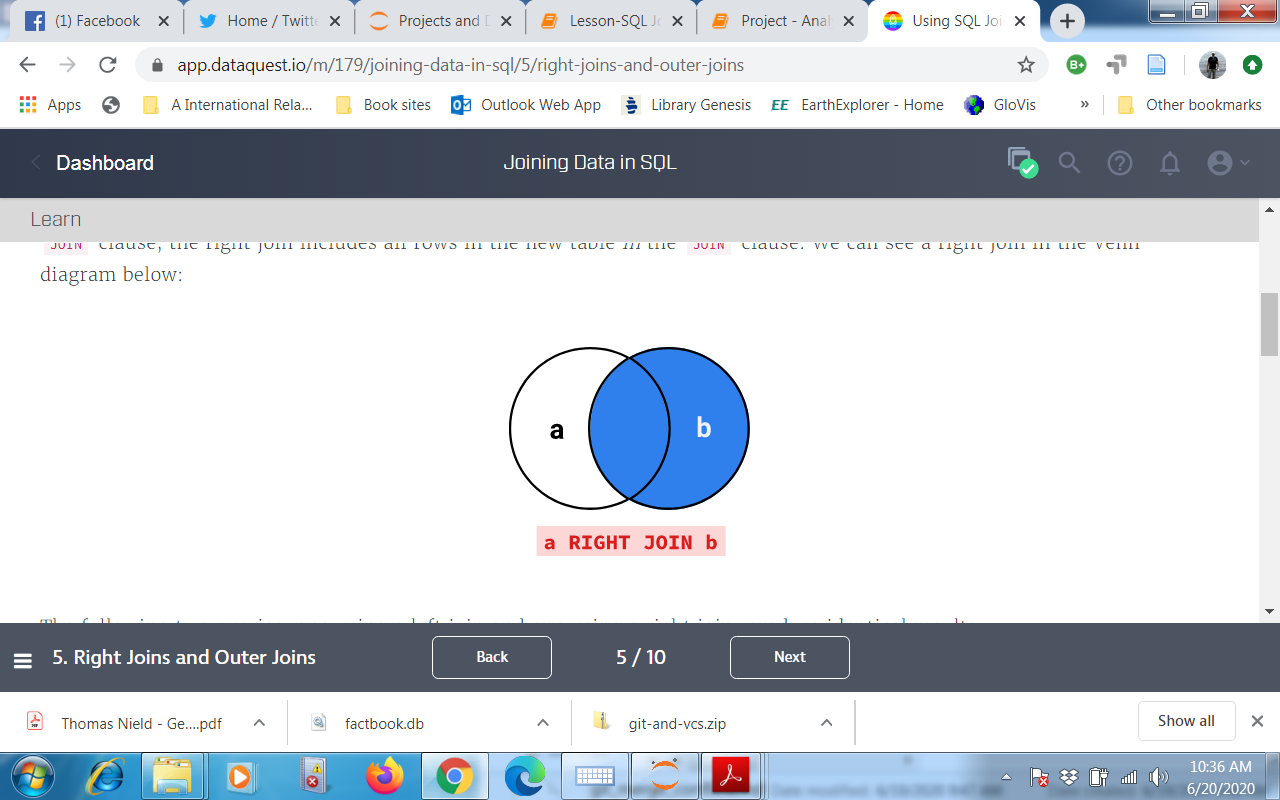



The other join type not supported by SQLite is a full outer join. A full outer join will include all rows from the tables on both sides of the join. Like right joins, full outer joins are reasonably uncommon, and similar results can be achieved using a union clause. The standard SQL syntax for a full outer join is:
```
SELECT f.name country, c.name city
FROM cities c
FULL OUTER JOIN facts f ON f.id = c.facts_id
LIMIT 5;
```
When joining cities and facts with a full outer join, the result will be be the same as our left and right joins above, because there are no values in cities.facts_id that don't exist in facts.id.

We can see a full outer join in the Venn diagram below:

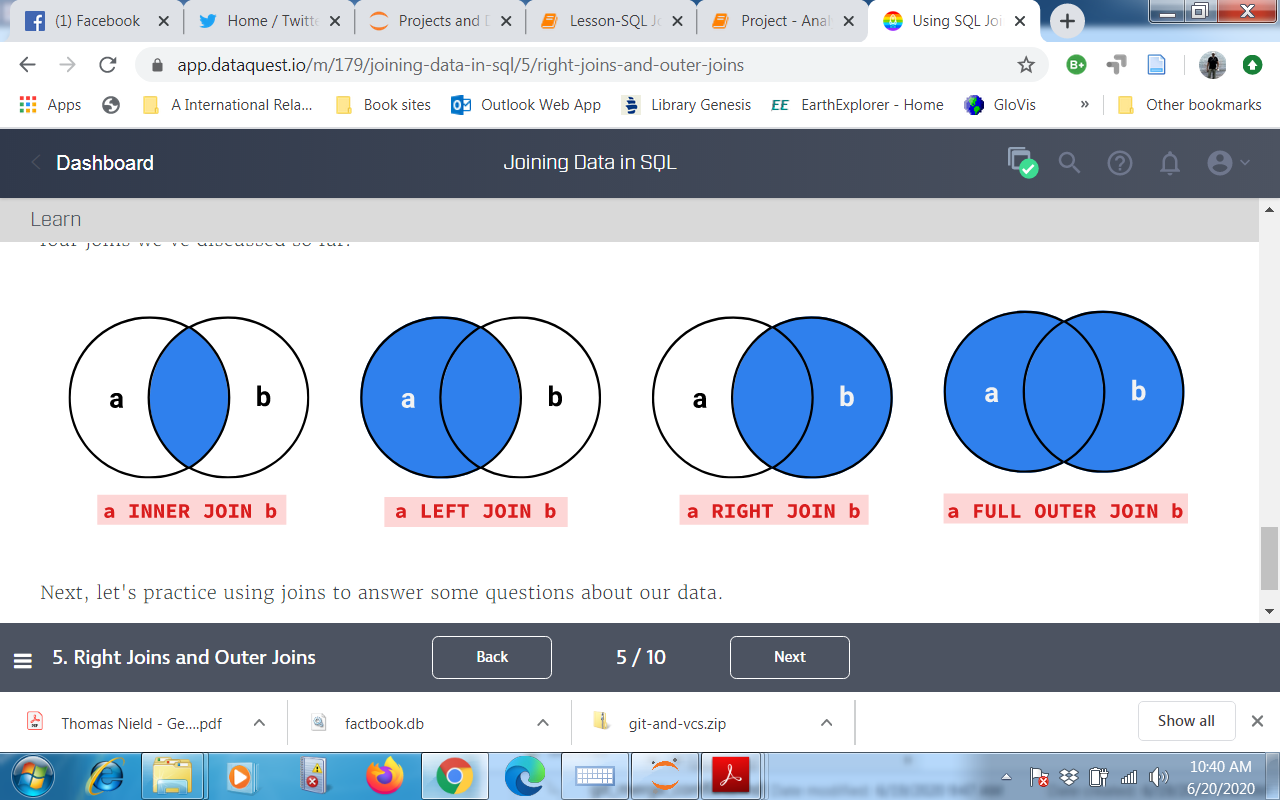

Venn diagrams of each join type side by side:

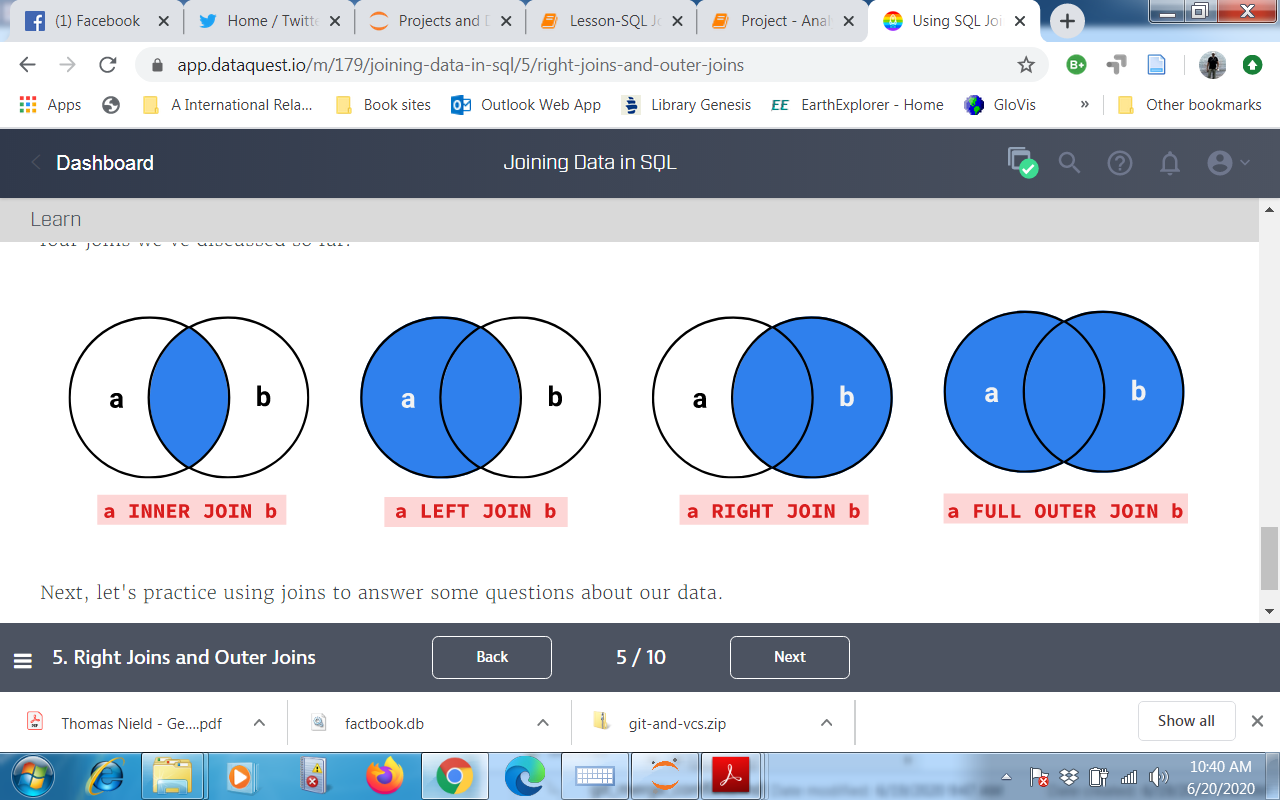

### Order By and Group By 

```
SELECT name, migration_rate FROM FACTS
ORDER BY migration_rate desc;
```
There is a handy shortcut we can use in our queries which lets us skip the column names, and instead use the order in which the columns appear in the SELECT clause.  In this instance, migration_rate is the second column in our SELECT clause so we can just use 2 instead of the column name:
```
SELECT name, migration_rate FROM FACTS
ORDER BY 2 desc;
```
We can use this shortcut in either the ORDER BY or GROUP BY clauses. Be mindful that we want to ensure our queries are still readable, so typing the full column name may be better for more complex queries.

Write a query:
- that returns the 10 capital cities with the highest population ranked from biggest to smallest population.
Include following columns, in order:
- capital_city, the name of the city.
- country, the name of the country the city is from.
- population, the population of the city.



In [14]:
%%sql
SELECT c.name AS capital_city, f.name AS country, c.population
  FROM facts aS f INNER JOIN cities AS c
    ON c.facts_id=f.id
WHERE c.capital=TRUE    
ORDER BY 3 DESC
LIMIT 10;

 * sqlite:///factbook_2.db
Done.


capital_city,country,population
Tokyo,Japan,37217000
New Delhi,India,22654000
Mexico City,Mexico,20446000
Beijing,China,15594000
Dhaka,Bangladesh,15391000
Buenos Aires,Argentina,13528000
Manila,Philippines,11862000
Moscow,Russia,11621000
Cairo,Egypt,11169000
Jakarta,Indonesia,9769000


### Combining Joins with Subqueries
Subqueries can be used to substitute parts of queries, allowing us to find the answers to more complex questions. We can also join to the result of a subquery, just like we could a table. an example of a using a join and a subquery to produce a table of countries and their capital cities:
```
SELECT f.name AS country, c.name AS capital_city
  FROM facts AS f INNER JOIN ((SELECT * FROM cities WHERE capital=1) AS c
    ON c.facts_id=f.id
LIMIT 10;
```
The important thing to remember is that the result of any subquery is always calculated first, so we read from the inside out.
- The subquery, in the parenthesis, is calculated first. This simple query selects all columns from cities, filtering rows that are marked as capital cities by having a value for capital of 1.
- The INNER JOIN joins the subquery result, aliased as c (alias of subquery not table), to the facts table based on the ON clause.
- Two columns are selected from the results of the join:
  - f.name, aliased as country.
  - c.name, aliased as capital_city.
- The results are limited to the first 10 rows.  

Using a join and a subquery, write a query:
- that returns capital cities with populations of over 10 million ordered from largest to smallest. Include the following columns:
 - capital_city - the name of the city.
 - country - the name of the country the city is the capital of.
 - population - the population of the city.

In [15]:
%%sql
SELECT c.name AS capital_city, f.name AS country, c.population
  FROM facts AS f 
INNER JOIN (SELECT * FROM cities 
            WHERE capital=1 
            AND population > 10000000
            ) AS c
         ON  c.facts_id=f.id
ORDER BY 3 DESC;   

 * sqlite:///factbook_2.db
Done.


capital_city,country,population
Tokyo,Japan,37217000
New Delhi,India,22654000
Mexico City,Mexico,20446000
Beijing,China,15594000
Dhaka,Bangladesh,15391000
Buenos Aires,Argentina,13528000
Manila,Philippines,11862000
Moscow,Russia,11621000
Cairo,Egypt,11169000


### Complex Queries with joins and Subqueries

When writing complex queries with joins and subqueries, it helps to follow this process:

- Think about what data you need in your final output
- Work out which tables you'll need to join, and whether you will need to join to a subquery.
- If you need to join to a subquery, write the subquery first.
- Then start writing your SELECT clause, followed by the join and any other clauses you will need.
- Don't be afraid to write your query in steps, running it as you go— for instance you can run your subquery as a 'stand alone' query first to make sure it looks like you want before writing the outer query.
Write a query that includes the following columns, in order:
 - country, the name of the country.
 - urban_pop, the sum of the population in major urban areas belonging to that country.
 - total_pop, the total population of the country.
 - urban_pct, the percentage of the popularion within , calculated by dividing urban_pop by total_pop.
- Only countries that have an urban_pct greater than 0.5.
- Rows should be sorted by urban_pct in ascending order.

In [16]:
%%sql
SELECT COUNT(*)
  FROM cities
WHERE facts_id NOT NULL   

 * sqlite:///factbook_2.db
Done.


COUNT(*)
397


In [17]:
%%sql
SELECT COUNT(DISTINCT(facts_id))
  FROM cities 

 * sqlite:///factbook_2.db
Done.


COUNT(DISTINCT(facts_id))
210


All entries have a facts_id entry so we can use this column for grouping in our subquery. We will first write subquery to determine urban population for each country (facts_id)

In [21]:
%%sql
SELECT facts_id, SUM(CAST(population AS FLOAT)) AS urban_pop
  FROM cities
GROUP BY facts_id
ORDER BY 1;    

 * sqlite:///factbook_2.db
Done.


facts_id,urban_pop
1,3097000.0
10,172000.0
100,1127000.0
101,5000.0
102,546000.0
103,94000.0
104,499000.0
105,1987000.0
106,772000.0
107,2720000.0


Write main query incorporating subquery (c) above

In [26]:
%%sql
SELECT 
    f.name AS country, 
    c.urban_pop, 
    CAST(f.population AS FLOAT) AS total_pop, 
    ROUND ((c.urban_pop/CAST(f.population as FLOAT)),2) AS urban_pct
    FROM facts AS f 
    INNER jOIN (SELECT facts_id, SUM(CAST(population AS FLOAT)) AS urban_pop 
                                FROM cities GROUP BY 1) AS c
      ON c.facts_id=f.id
WHERE urban_pct > 0.5
ORDER BY 4;

 * sqlite:///factbook_2.db
Done.


country,urban_pop,total_pop,urban_pct
"Congo, Republic of the",2445000.0,4755097.0,0.51
Brunei,241000.0,429646.0,0.56
New Caledonia,157000.0,271615.0,0.58
Virgin Islands,60000.0,103574.0,0.58
Falkland Islands (Islas Malvinas),2000.0,3361.0,0.6
Djibouti,496000.0,828324.0,0.6
Australia,13789000.0,22751014.0,0.61
Iceland,206000.0,331918.0,0.62
Israel,5226000.0,8049314.0,0.65
United Arab Emirates,3903000.0,5779760.0,0.68
